In [1]:
import sklearn
print(f"scikit-learn version: {sklearn.__version__}")

import numpy as np
import matplotlib.pyplot as plt
print("All libraries loaded successfully!")


scikit-learn version: 1.6.1
All libraries loaded successfully!


In [2]:
from sklearn.datasets import load_iris

iris = load_iris()
x = iris.data
y= iris.target
print(f"Feature names: {iris.feature_names}")
print(f"Target names: {iris.target_names}")
print(f"Data shape: {x.shape}")
print(f"First three rows: \n{x[:3]}")

Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target names: ['setosa' 'versicolor' 'virginica']
Data shape: (150, 4)
First three rows: 
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]]


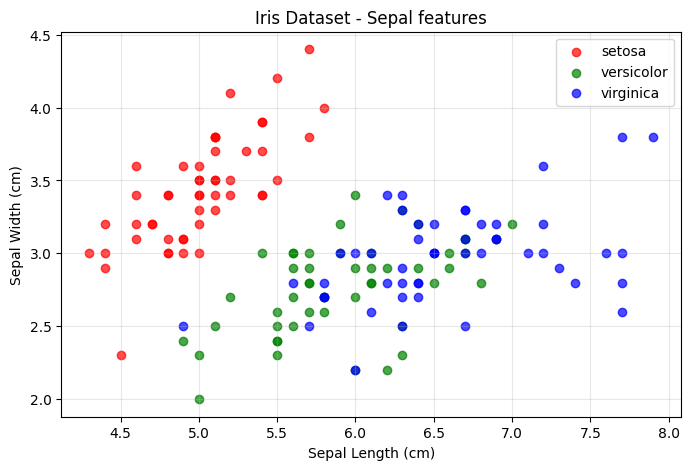

In [3]:
plt.figure(figsize=(8, 5))
colors = ["red", "green", "blue"]

for i,name in enumerate(iris.target_names):
  mask = y == i
  plt.scatter(x[mask, 0], x[mask, 1], color=colors[i], label=name, alpha=0.7)

plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.title("Iris Dataset - Sepal features")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]] [0 0 0 0 0 0 0 0 0 0]


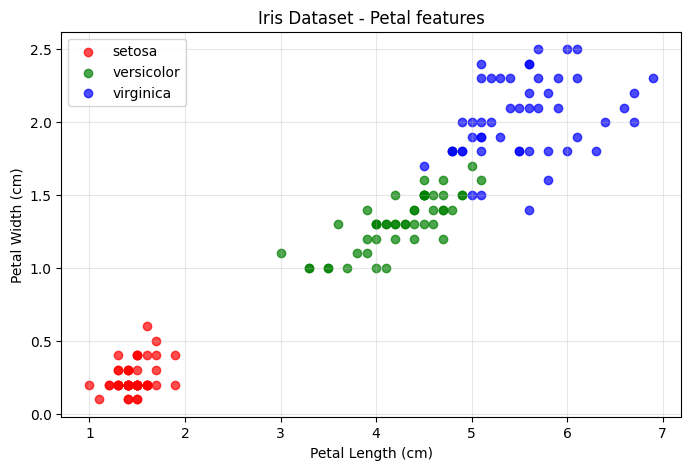

In [4]:
import numpy as np
print(x[:10], y[:10])
np.unique(y, return_counts=True)

plt.figure(figsize=(8, 5))
colors = ["red", "green", "blue"]

for i, name in enumerate(iris.target_names):
  mask = y == i
  plt.scatter(x[mask, 2], x[mask, 3], color=colors[i], label=name, alpha=0.7)

plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")
plt.title("Iris Dataset - Petal features")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


### Train Test Split

In [5]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)
print(f"X train shape: {x_train.shape[0]} samples")
print(f"X test shape: {x_test.shape[0]} samples")
print(f"Y train shape: {y_train.shape[0]} samples")
print(f"Y test shape: {y_test.shape[0]} samples")
np.unique(y_train, return_counts=True)
np.unique(y_test, return_counts=True)

X train shape: 120 samples
X test shape: 30 samples
Y train shape: 120 samples
Y test shape: 30 samples


(array([0, 1, 2]), array([10, 10, 10]))

In [6]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42) # without stratify
print(f"X train shape: {x_train.shape[0]} samples")
print(f"X test shape: {x_test.shape[0]} samples")
print(f"Y train shape: {y_train.shape[0]} samples")
print(f"Y test shape: {y_test.shape[0]} samples")
np.unique(y_train, return_counts=True)
np.unique(y_test, return_counts=True)

X train shape: 120 samples
X test shape: 30 samples
Y train shape: 120 samples
Y test shape: 30 samples


(array([0, 1, 2]), array([10,  9, 11]))

# Training models

### Decision Tree

In [6]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(x_train, y_train)
dt_predictions = dt_model.predict(x_test)
print(f"Decision Tree Predictions (first 10 rows): \n{dt_predictions[:10]}")
print(f"Actual labels (first 10 rows): \n{y_test[:10]}")

Decision Tree Predictions (first 10 rows): 
[0 2 1 1 0 1 0 0 2 1]
Actual labels (first 10 rows): 
[0 2 1 1 0 1 0 0 2 1]


### KNN

In [7]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5) # the output doesnt change when changing n_neighbors to 3 and 10
knn_model.fit(x_train, y_train)
knn_predictions = knn_model.predict(x_test)

print(f"KNN predictions (first 10 rows): \n{knn_predictions[:10]}")

KNN predictions (first 10 rows): 
[0 2 1 1 0 1 0 0 2 1]


# Evaluating Model Performance

In [8]:
from sklearn.metrics import accuracy_score

dt_accuracy = accuracy_score(y_test, dt_predictions)
knn_accuracy = accuracy_score(y_test, knn_predictions)

print(f"Decision Tree Accuracy: {dt_accuracy: .2%}")
print(f"KNN Accuracy: {knn_accuracy: .2%}")

Decision Tree Accuracy:  93.33%
KNN Accuracy:  100.00%


### Classification Report

In [9]:
from sklearn.metrics import classification_report

print("=== Decision Tree Report ===")
print(classification_report(y_test, dt_predictions, target_names=iris.target_names))

print("=== KNN Report ===")
print(classification_report(y_test, knn_predictions, target_names=iris.target_names))

=== Decision Tree Report ===
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      0.90      0.90        10
   virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30

=== KNN Report ===
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00        10
   virginica       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



### Confusion Matrix

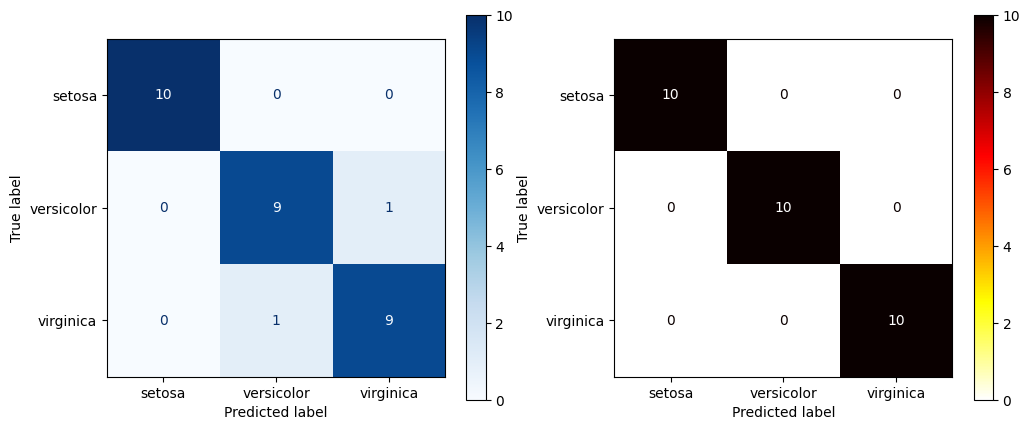

In [10]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

cm_dt = confusion_matrix(y_test, dt_predictions)
ConfusionMatrixDisplay(cm_dt, display_labels=iris.target_names).plot(ax=axes[0], cmap="Blues")

cm_knn = confusion_matrix(y_test, knn_predictions)
ConfusionMatrixDisplay(cm_knn, display_labels=iris.target_names).plot(ax=axes[1], cmap="hot_r")

# Task 4

### 1. Which model achieved higher accuracy?
KNN achieved higher accuracy

### 2. Look at the confusion matrices – which class was hardest to classify? Why?
Versicolor was the hardest class to classify because the confusion matrix shows the highest number of misclassifications for it

### 3. Which metric (precision or recall) would be more important in a medical diagnosis scenario? Explain briefly.

Recall, because recall shows how many actual sick patients were identified and minimizes the danger of false negatives.

In [20]:
import numpy as np

# A new flower measurement (sepal_l, sepal_w, petal_l, petal_w)
new_flower = np.array([[5.1, 3.5, 1.4, 0.2]])

dt_pred = dt_model.predict(new_flower)
knn_predict = knn_model.predict(new_flower)

print(f"Decision Tree says: {iris.target_names[dt_pred[0]]}")
print(f"KNN says: {iris.target_names[knn_pred[0]]}")

Decision Tree says: setosa
KNN says: setosa


In [21]:
# TASK 5

flowerA = np.array([[6.7, 3.0, 5.2, 2.3]])
flowerB = np.array([[5.8, 2.7, 4.1, 1.0]])
flowerC = np.array([[4.9, 3.1, 1.5, 0.1]])

dt_pred = dt_model.predict(flowerA)
knn_pred = knn_model.predict(flowerA)
print(f"Decision Tree says: {iris.target_names[dt_pred[0]]}")
print(f"KNN says: {iris.target_names[knn_pred[0]]}")

dt_pred = dt_model.predict(flowerB)
knn_pred = knn_model.predict(flowerB)
print(f"Decision Tree says: {iris.target_names[dt_pred[0]]}")
print(f"KNN says: {iris.target_names[knn_pred[0]]}")

dt_pred = dt_model.predict(flowerC)
knn_pred = knn_model.predict(flowerC)
print(f"Decision Tree says: {iris.target_names[dt_pred[0]]}")
print(f"KNN says: {iris.target_names[knn_pred[0]]}")

# Both models agree on all 3.

Decision Tree says: virginica
KNN says: virginica
Decision Tree says: versicolor
KNN says: versicolor
Decision Tree says: setosa
KNN says: setosa


# Part 7: Working with Your Own CSV Data

In [67]:
import pandas as pd

np.random.seed(42)
n = 100

data = {
    'study_hours': np.round(np.random.uniform(1, 10, n), 1),
    'attendance_pct': np.round(np.random.uniform(40, 100, n), 1),
    'assignments': np.random.randint(3, 10, n),
    'passed' : np.random.choice([0, 1], n, p=[0.35, 0.65])
}

df = pd.DataFrame(data)
df.to_csv('students.csv', index=False)
print(f"CSV file saved! Printing first 5 rows:\n {df.head()}")

CSV file saved! Printing first 5 rows:
    study_hours  attendance_pct  assignments  passed
0          4.4            41.9            6       0
1          9.6            78.2            5       1
2          7.6            58.9            3       1
3          6.4            70.5            6       1
4          2.4            94.5            8       1


In [29]:
df = pd.read_csv("students.csv")

print(f"Df shape: {df.shape}")
print(f"Df data types: {df.dtypes}")
print(f"Basic stats:\n{df.describe()}")

Df shape: (100, 4)
Df data types: study_hours       float64
attendance_pct    float64
assignments         int64
passed              int64
dtype: object
Basic stats:
       study_hours  attendance_pct  assignments      passed
count   100.000000      100.000000   100.000000  100.000000
mean      5.233000       69.871000     6.000000    0.690000
std       2.681438       17.583476     1.959179    0.464823
min       1.000000       40.400000     3.000000    0.000000
25%       2.775000       54.500000     4.750000    0.000000
50%       5.150000       70.350000     6.000000    1.000000
75%       7.600000       85.975000     8.000000    1.000000
max       9.900000       99.100000     9.000000    1.000000


In [36]:
x = df[['study_hours', 'attendance_pct', 'assignments']].values
y = df['passed'].values

print(f"Features shape: {x.shape}")
print(f"Target shape:   {y.shape}")
print(f"Class counts:   {np.unique(y, return_counts=True)}")

Features shape: (100, 3)
Target shape:   (100,)
Class counts:   (array([0, 1]), array([31, 69]))


In [66]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)
model = DecisionTreeClassifier(random_state=42)
model.fit(x_train, y_train)

predictions = model.predict(x_test)
print(f"Accuracy score: {accuracy_score(y_test, predictions):.2%}")
print(f"Classification Report: \n{classification_report(y_test, predictions, target_names=["Failed", "Passed"])}")

Accuracy score: 55.00%
Classification Report: 
              precision    recall  f1-score   support

      Failed       0.29      0.33      0.31         6
      Passed       0.69      0.64      0.67        14

    accuracy                           0.55        20
   macro avg       0.49      0.49      0.49        20
weighted avg       0.57      0.55      0.56        20



In [46]:
print(df.describe())
df.info()

       study_hours  attendance_pct  assignments      passed
count   100.000000      100.000000   100.000000  100.000000
mean      5.233000       69.871000     6.000000    0.690000
std       2.681438       17.583476     1.959179    0.464823
min       1.000000       40.400000     3.000000    0.000000
25%       2.775000       54.500000     4.750000    0.000000
50%       5.150000       70.350000     6.000000    1.000000
75%       7.600000       85.975000     8.000000    1.000000
max       9.900000       99.100000     9.000000    1.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   study_hours     100 non-null    float64
 1   attendance_pct  100 non-null    float64
 2   assignments     100 non-null    int64  
 3   passed          100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB


In [54]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)
knn_predicts = knn.predict(x_test)

print(f"Accuracy score: {accuracy_score(y_test, knn_predicts):.2%}")
print(f"Classification Report:\n {classification_report(y_test, knn_predicts, target_names=["Failed", "Passed"])}")

Accuracy score: 60.00%
Classification Report:
               precision    recall  f1-score   support

      Failed       0.33      0.33      0.33         6
      Passed       0.71      0.71      0.71        14

    accuracy                           0.60        20
   macro avg       0.52      0.52      0.52        20
weighted avg       0.60      0.60      0.60        20



# Adding a new feature

In [76]:
np.random.seed(42)
df["quiz_score"] = np.random.randint(0,10,n)

x = df[['study_hours', 'attendance_pct', 'assignments','quiz_score']].values
y=df['passed'].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

dtree_model = DecisionTreeClassifier(random_state=42)
dtree_model.fit(x_train, y_train)
dtree_predictions = dtree_model.predict(x_test)

knn_mod = KNeighborsClassifier(n_neighbors=5)
knn_mod.fit(x_train, y_train)
kpredict = knn_mod.predict(x_test)

print(f"Accuracy score: {accuracy_score(y_test, dtree_predictions):.2%}")
print(f"Classification Report: \n{classification_report(y_test, dtree_predictions, target_names=["Failed", "Passed"])}")

print(f"Accuracy score: {accuracy_score(y_test, kpredict):.2%}")
print(f"Classification Report: \n{classification_report(y_test, kpredict, target_names=["Failed", "Passed"])}")

Accuracy score: 55.00%
Classification Report: 
              precision    recall  f1-score   support

      Failed       0.29      0.33      0.31         6
      Passed       0.69      0.64      0.67        14

    accuracy                           0.55        20
   macro avg       0.49      0.49      0.49        20
weighted avg       0.57      0.55      0.56        20

Accuracy score: 60.00%
Classification Report: 
              precision    recall  f1-score   support

      Failed       0.33      0.33      0.33         6
      Passed       0.71      0.71      0.71        14

    accuracy                           0.60        20
   macro avg       0.52      0.52      0.52        20
weighted avg       0.60      0.60      0.60        20



In this case, quiz_score didn't effect the result because the dataset is completely random, and whether or not a student passes or fails is generated completely at random.